In [1]:
from tsv_data_analytics import tsvutils
from tsv_data_analytics_ext import graphext
import statistics

from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important;}</style>"))
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))

In [52]:
# Import the yfinance. If you get module not found error the run !pip install yfiannce from your Jupyter notebook 
import yfinance as yf   
 
# Get the data of the stock CRWD 
x = tsvutils.read_df(yf.download("CRWD", "2010-01-01", "2021-11-13"))
x.sample_rows(5).export_to_df()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,209.9600067138672,211.44000244140625,195.98500061035156,200.49000549316406,200.49000549316406,6281300
1,2021-02-25,216.42999267578125,221.80599975585938,204.89999389648438,208.66000366210938,208.66000366210938,3604400
2,2019-08-09,90.25,98.0,90.0,94.9000015258789,94.9000015258789,3062200
3,2020-06-30,98.44000244140625,101.37999725341797,97.33000183105469,100.29000091552734,100.29000091552734,5056200
4,2021-07-09,262.9549865722656,265.0,259.6000061035156,264.44000244140625,264.44000244140625,2587000


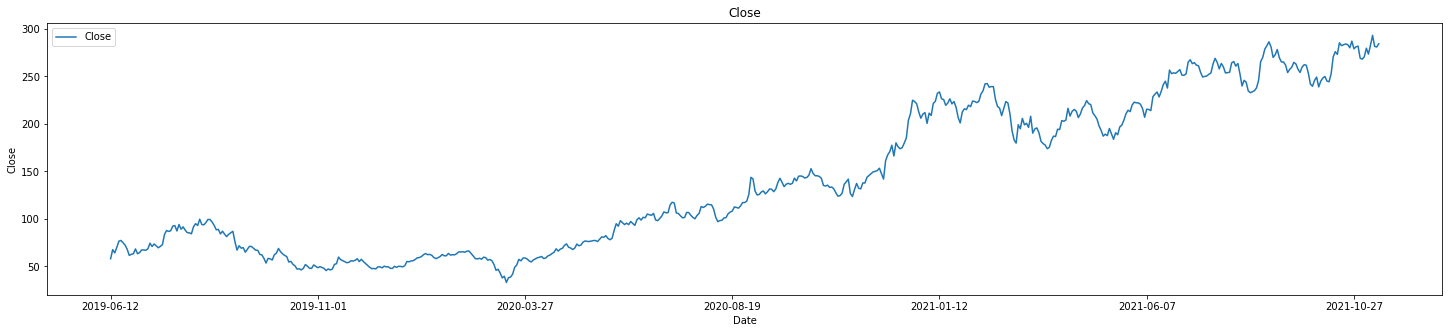

In [53]:
# get the basic trend of stock price
x.extend_class(graphext.VisualTSV) \
    .linechart("Date", ["Close"])


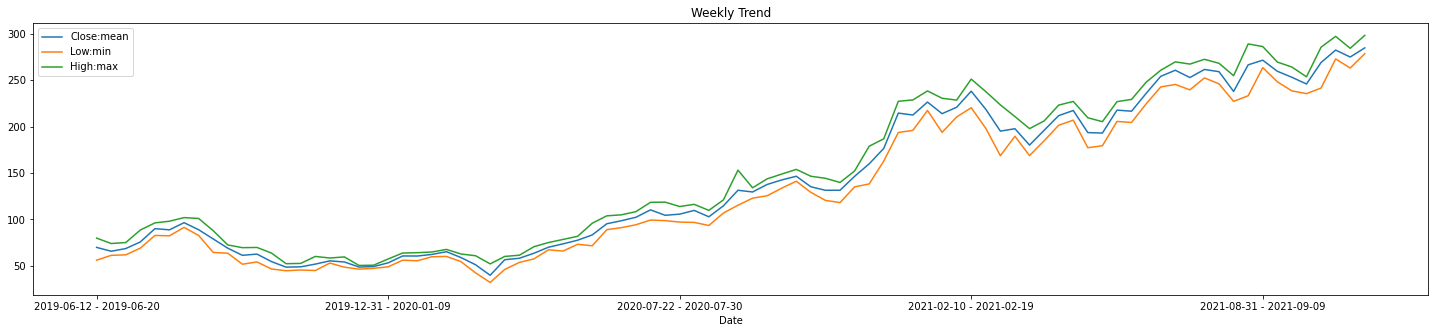

In [54]:
# get weekly mean, low and high using window_aggregate function
x \
    .window_aggregate("Date", ["Close", "Low", "High"], [statistics.mean, min, max], winsize = 7, sliding = False) \
    .extend_class(graphext.VisualTSV).linechart("Date", ["Close:mean", "Low:min", "High:max"], title = "Weekly Trend")